# Support Vector Machines
## This notebook outlines the main concepts behind the Support Vector Machines

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## Discriminative Classifier

### Create 50 total points with 25 red and 25 yellow data points
- n_smaples = 50
- centers = 2
- cluster_std = 0.60

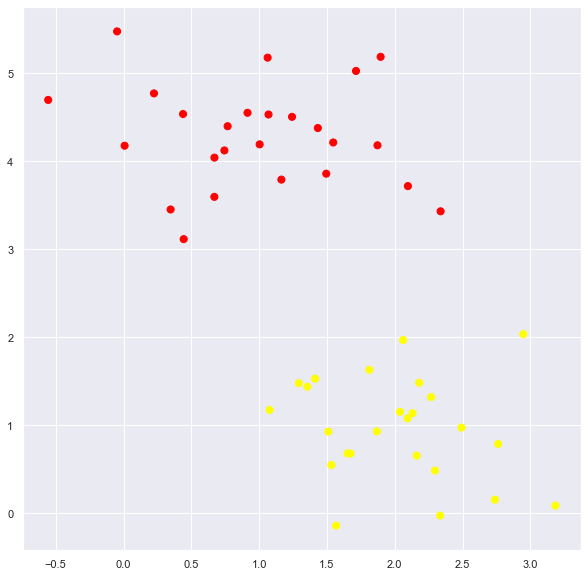

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, 
                  centers=2,
                  random_state=0, 
                  cluster_std=0.60
)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Lets explore make_blobs

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, 
                  centers=3, 
                  n_features=2,
                  random_state=0
)
print(X)

[[ 1.12031365  5.75806083]
 [ 1.7373078   4.42546234]
 [ 2.36833522  0.04356792]
 [ 0.87305123  4.71438583]
 [-0.66246781  2.17571724]
 [ 0.74285061  1.46351659]
 [-4.07989383  3.57150086]
 [ 3.54934659  0.6925054 ]
 [ 2.49913075  1.23133799]
 [ 1.9263585   4.15243012]]


In [4]:
X, y = make_blobs(n_samples=[3, 3, 4], 
                  centers=None, 
                  n_features=2,
                  random_state=0
)
X.shape, y.shape

((10, 2), (10,))

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.

**Problem**: More than one possible dividing line that can perfectly discriminate between the two classes!

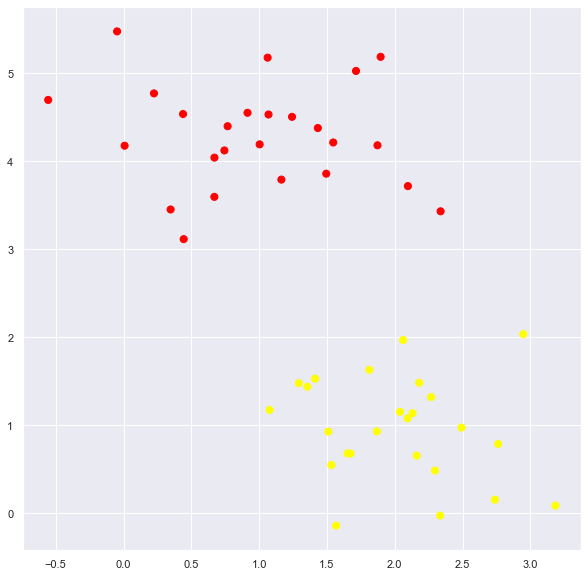

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, 
                  centers=2,
                  random_state=0, 
                  cluster_std=0.60
)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

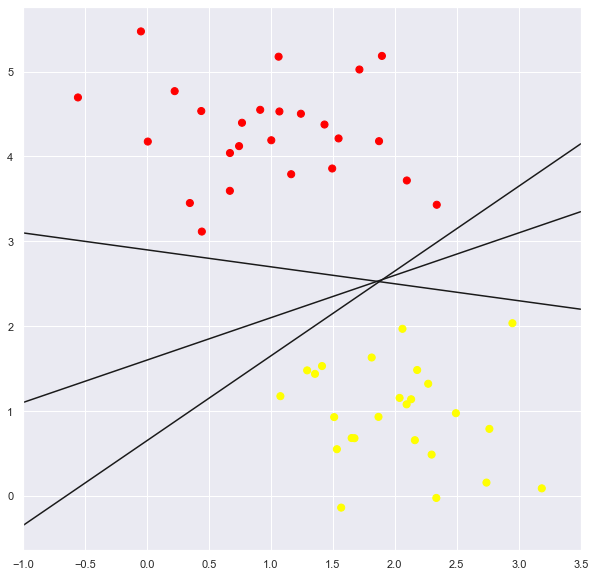

In [6]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### Lets choose a data point marked with 'X'
### Where do you put it?

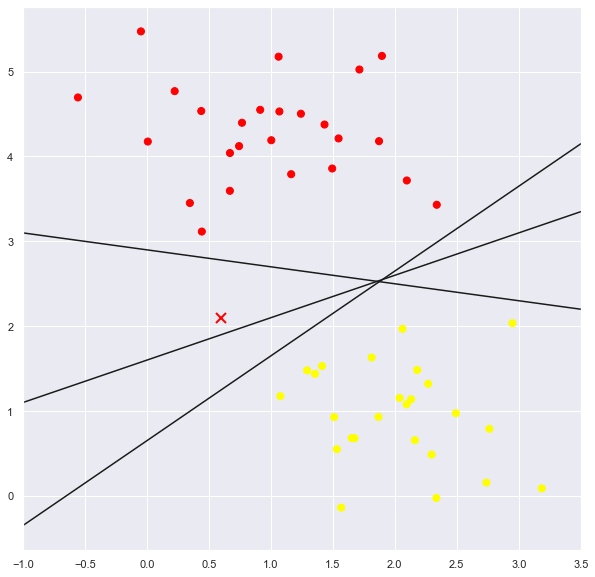

In [7]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')

plt.xlim(-1, 3.5);

- 3 different lines are shown here.
- Many more are possible.
- All perfectly discriminates the two sets of balls.

### Which line to choose?

- All the above drawn lines have zero-width
- How about drawing each line with **margin** until it touches the nearest data point (DMZ)

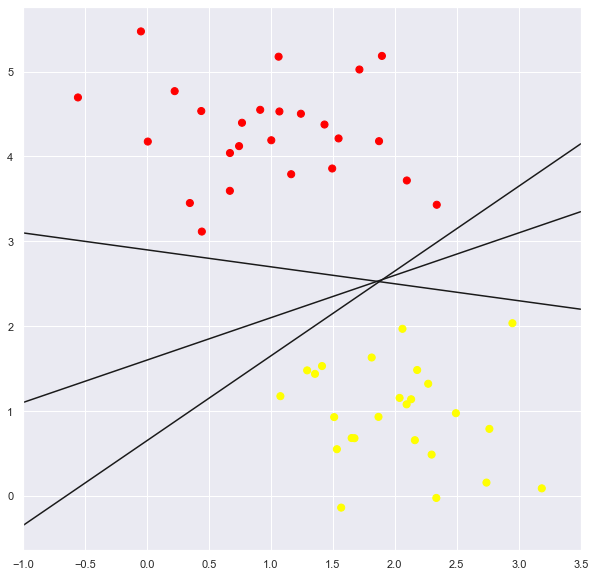

In [8]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')

plt.xlim(-1, 3.5);

### Something like this

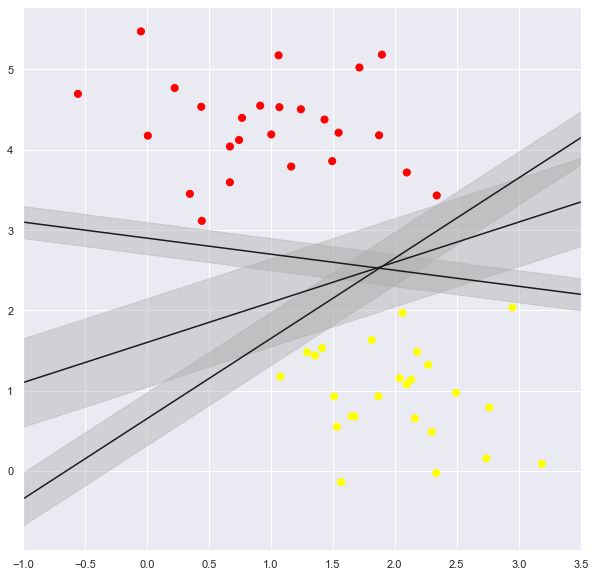

In [9]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Will this line with the maximum margin (width) be the optimal line???

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a **maximum margin** estimator.

### Instead of drawing the margin around the lines by hand, lets leave it to the machine to figure that line out

### Import the Support Vector Machine Classifier

In [10]:
from sklearn.svm import SVC

### Create a Support Vector Machine Classifier

In [11]:
model = SVC(kernel='linear', C=1E10)

### Fit the model

In [12]:
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Helper function to visualize decision boundary for the data

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=2, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

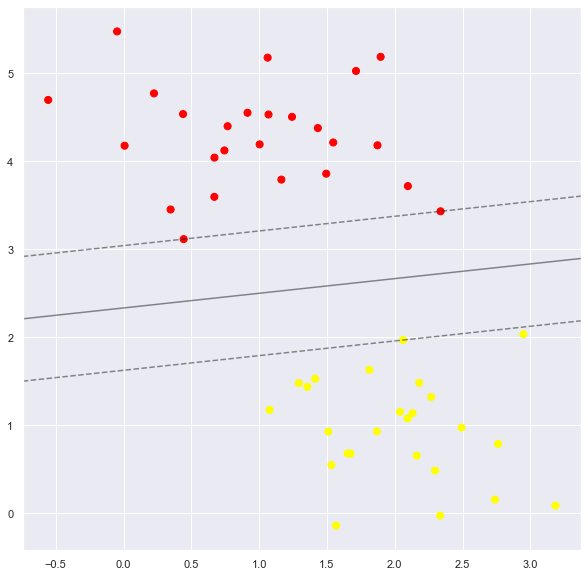

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

- Model found the optimal line with maximum margin
- **support vectors**

In [15]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Inner Workings of the algorithm
- Only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
- The farthest points do not contribute to the loss function used to fit the model

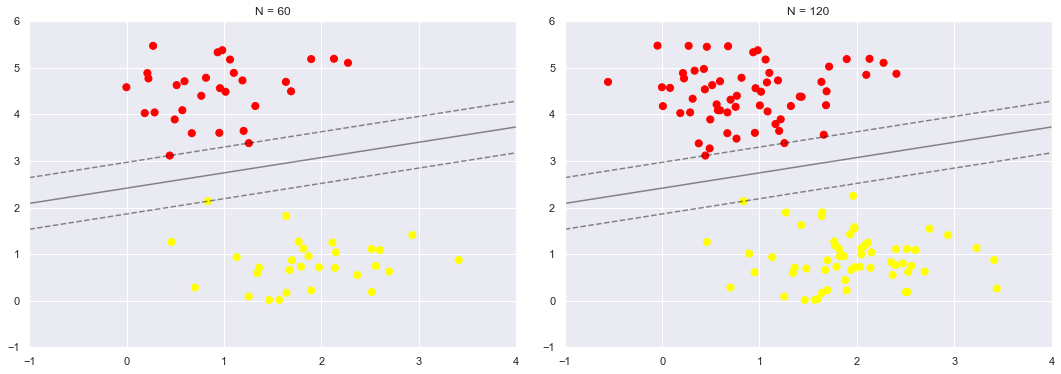

In [16]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- Left panel: 60 training points
- Right panel: 120 training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel.
- **Insensitivity** to the exact behavior of distant points

Play and see how decision boundary differs with different number of samples

In [17]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 25, 50, 75, 100, 125, 150, 175, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 25, 50, 75, 100, 125, 150, 175, 200), value=10), …

### Linearly Non-separable data

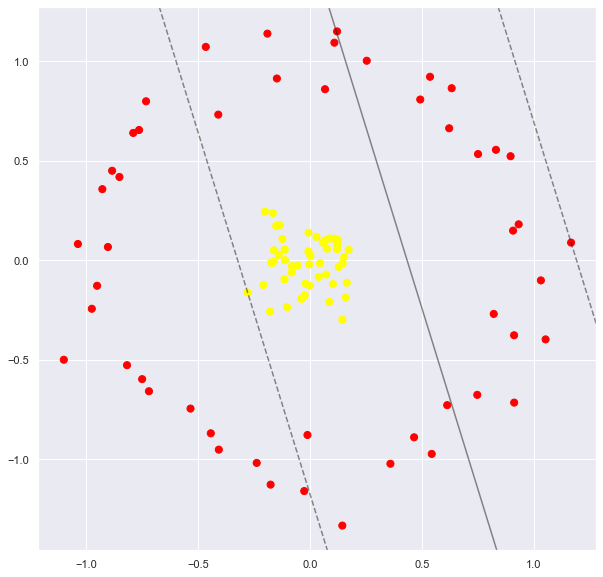

In [18]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)

clf = SVC(kernel='linear').fit(X, y)

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Non- linear boundaries: Kernel SVM

- Awesome to model linear data
- **Kernel Trick**: Project data into higher-dimensional space defined by polynomials/Gaussian/Sigmoidal/any other basis functions, and fit for nonlinear relationships with a linear classifier.

- Take the data to a higher dimension and try to find a decision boundary (plane) to discriminate the classes
- Radial Basis Functions (RBF)

In [19]:
r = np.exp(-(X ** 2).sum(1))

Visualize the higher-dimensional projection of the above data

In [20]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

- **Kernel transformation**: One strategy to this end is to compute a basis function centered at *every* point in the dataset, and let the SVM algorithm sift through the results.

- Problem: Computationally intensive
- **Kernel Trick**: a fit on kernel-transformed data can be done implicitly—that is, without ever building the full $N$-dimensional representation of the kernel projection!
This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

Source: **Wiki**

Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates. This approach is called the "**kernel trick**". Any linear model can be turned into a non-linear model by applying the kernel trick to the model: replacing its features (predictors) by a kernel function.

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

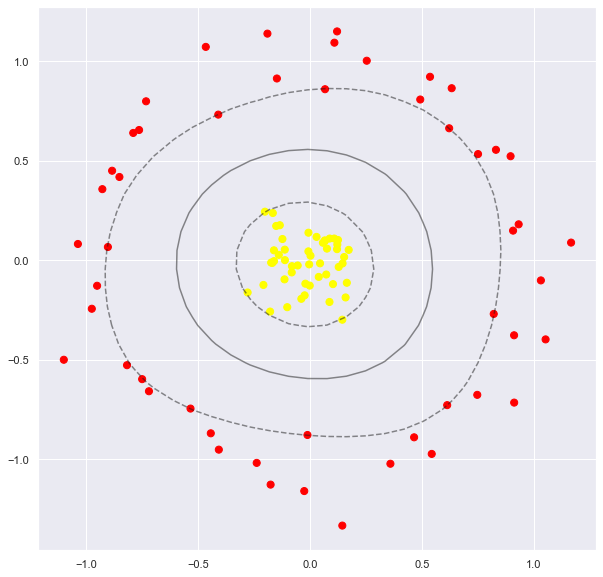

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

- Clean Linearly Separable Decision Boundary is seen.

### $C$ Parameter

- Overlapping dataset

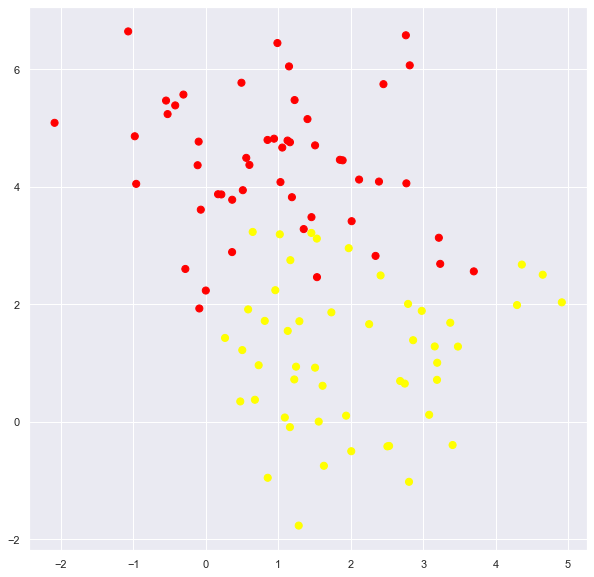

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Can you draw clean lines by hand that seperates the two classes? 

- Not possible until you allow some points to enter the DMZ beyond the margin lines.
- $C$ controls this hard DMZ property
    - If $C$ is large, margin is **hard**, no points can enter into DMZ
    - If $C$ is small, margin is **soft**, points can enter the DMZ
- $C$ parameter should be tuned according to the dataset

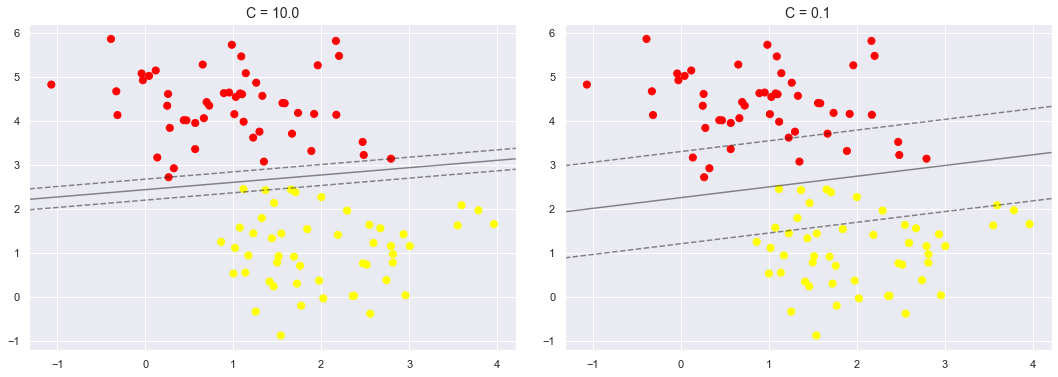

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Support Vector Machines

- Compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.

### Takeaways
- First, try out simpler, faster algorithms.
- Choose SVM only if those didn't give expected results.
- Choose SVM first if you have computational power at your disposal to training and cross-validating on your very large data.